# Anuran Calls, Clustering and Classification


#### Number of Instances (records in your data set): 7195
#### Number of Attributes (fields within each record): 22 + 3

Acoustic features extracted from syllables of anuran (frogs) calls, including the family, the genus, and the species labels. From every extracted syllable 22 MFCCs were calculated. Using these columns containing information about these mfcc's we will try to see how the data looks and will try to use clustering algorihtms to look for the cluster in this data set and will look if it is possible to classify these frogs if the mfcc's of a frog call was given to us.

#####                                                                                                                                                                                     Author of the notebook : Debjit Paria 

In [43]:
import pandas as pd
import csv
import numpy as np 


df = pd.read_csv('Frogs_MFCCs.csv')

print(df.head(1))


   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10    ...     MFCCs_17  MFCCs_18  MFCCs_19  \
0 -0.150063 -0.171128  0.124676    ...    -0.108351 -0.077623 -0.009568   

   MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus         Species  \
0  0.057684   0.11868  0.014038  Leptodactylidae  Adenomera  AdenomeraAndre   

   RecordID  
0         1  

[1 rows x 26 columns]


In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X= df.iloc[:,range(0,22)]
X_scaled = scaler.fit_transform(X)

y = df['Species']
y_actual = y
le = preprocessing.LabelEncoder()
le.fit(y)

y = np.array(le.transform(y))

## Visualizing the data using tsne

### Original Data

ready


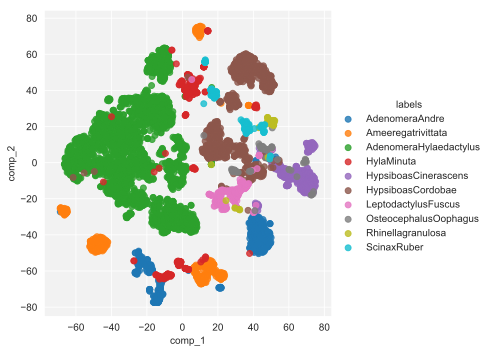

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

model = TSNE(learning_rate=100)

transformed = model.fit_transform(X)
tsne_data = pd.DataFrame(transformed)


matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(tsne_data)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_actual
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")

### Scaled Data

ready


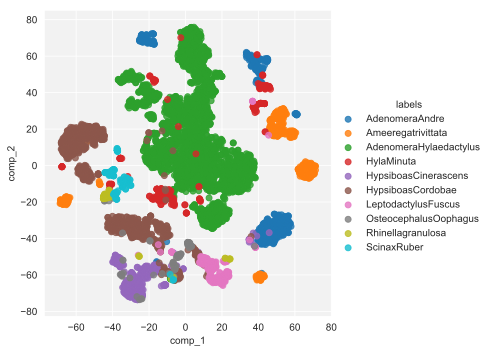

In [46]:
scaled_transformed = model.fit_transform(X_scaled)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(scaled_transformed)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_actual
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")

## Analysing the best number of clusters

### K-means and silhouette score graph on original data

Text(0.5, 1.0, 'Elbow')

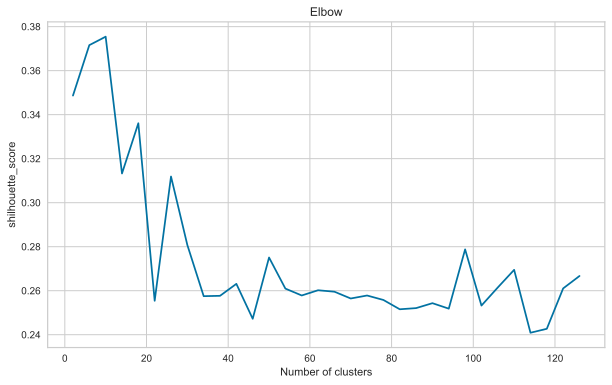

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import silhouette_score
from matplotlib.pyplot import figure
figure(figsize=(10,6))

n_clusters = 2

xa = []
ya = []
acc = []
while(n_clusters <= 126):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(X)
    prediction= kmeans.predict(X)
    
    labels = np.zeros_like(prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = silhouette_score(X, labels, metric='euclidean')
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 4

plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('shilhouette_score')
plt.title("Elbow")


### K-means and silhouette score graph on scaled data

Text(0.5, 1.0, 'Elbow')

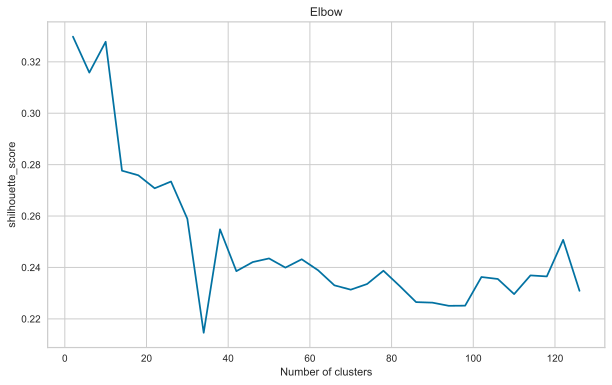

In [106]:
n_clusters = 2

xa = []
ya = []
acc = []
while(n_clusters <= 126):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(X_scaled)
    prediction= kmeans.predict(X_scaled)
    
    labels = np.zeros_like(prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = silhouette_score(X_scaled, labels, metric='euclidean')
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 4
figure(figsize=(10,6))
plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('shilhouette_score')
plt.title("Elbow")


### K-means and silhouette score graph on scaled and transformed tsne data.

Text(0.5, 1.0, 'Elbow')

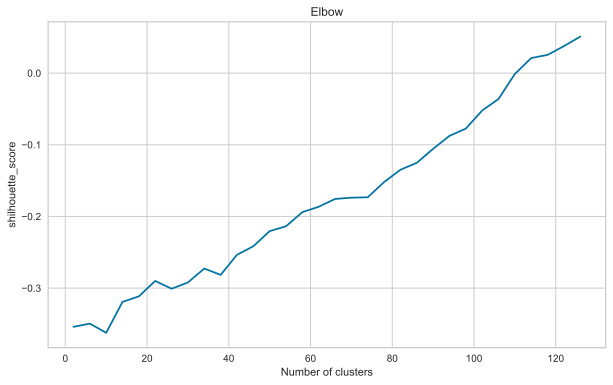

In [107]:
n_clusters = 2

xa = []
ya = []
acc = []
while(n_clusters <= 126):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(scaled_transformed)
    tsne_prediction= kmeans.predict(scaled_transformed)

    labels = np.zeros_like(tsne_prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = silhouette_score(scaled_transformed, labels, metric='euclidean')
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 4
figure(figsize=(10,6))
plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('shilhouette_score')
plt.title("Elbow")


#### One might think that there is something wrong in my code of tsne and k-means as the curve is increasing. But when we print the accuracies we see that they are incresing as the number of clusters increase thus cross-checking that my code is fine and is not faulty.


In [103]:
print(acc)

[0.10284920083391244, 0.1488533703961084, 0.18526754690757471, 0.24002779708130648, 0.25156358582348853, 0.31077136900625435, 0.3502432244614315, 0.3745656706045865, 0.4130646282140375, 0.4394718554551772, 0.47644197359277274, 0.5007644197359278, 0.522168172341904, 0.5259207783182765, 0.5774843641417651, 0.5926337734537873, 0.6197359277275886, 0.638082001389854, 0.6432244614315497, 0.6874218207088256, 0.7261987491313412, 0.7405142460041696, 0.7948575399583043, 0.809728978457262, 0.8371091035441278, 0.8565670604586518, 0.8992355802640722, 0.9216122307157748, 0.9373175816539263, 0.9514940931202224, 0.9644197359277276, 0.9744266851980542]


## Conclusion for the best cluster range 

Looking at the three graphs of silhouette score we can say that it is somewhere between 25 and 45. 
As looking at the first two graphs tells us that after 40 the graph is almost stable, as for the last one doesn't help us much, but helps us figure out the fact that in tsne the cluster are less spread out.

So lets look at the graph of silhouette score n_clusters in between 20 and 50.

From these graphs we can conclude that K-means on scaled data is working really well achieving the lowest silhouette score.
So we will use K-means on scaled data for our next analysis.

Text(0.5, 1.0, 'Elbow')

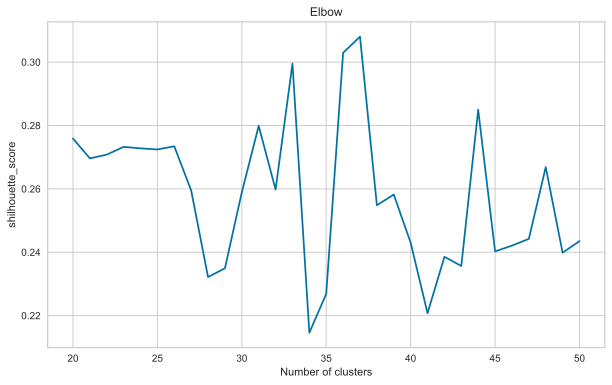

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import silhouette_score
n_clusters = 20

xa = []
ya = []
acc = []
while(n_clusters <= 50):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(X_scaled)
    prediction= kmeans.predict(X_scaled)
    
    labels = np.zeros_like(prediction)
    
    for i in range(n_clusters):
        mask = (prediction == i)
        labels[mask] = mode(y[mask])[0]
    
    ac = silhouette_score(X_scaled, labels, metric='euclidean')
        
    xa.append(ac)
    ya.append(n_clusters)
    acc.append(accuracy_score(y, labels))
    
    n_clusters = n_clusters + 1
figure(figsize=(10,6))
plt.plot(ya, xa)
plt.xlabel('Number of clusters')
plt.ylabel('shilhouette_score')
plt.title("Elbow")


## Conclusion on the best number of clusters

As we can observe that the minimum silhouette score is for number of clusters being 34.
    So now we will visualize how the clusters are using tsne.


#### TSNE visualization of clusters formed using k-means on orginal data

Accuracy:  0.9357887421820709


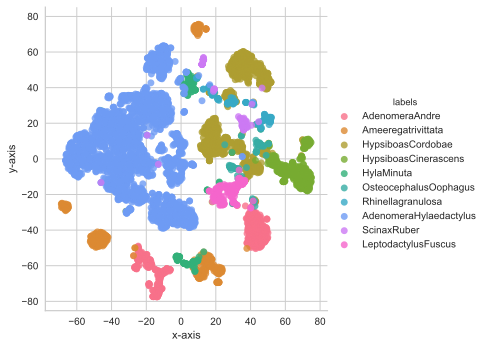

In [115]:
kmeans = KMeans(n_clusters = 34, random_state = 1)
kmeans.fit(X)
prediction= kmeans.predict(X)
    
labels = np.zeros_like(prediction)

for i in range(n_clusters):
    mask = (prediction == i)
    labels[mask] = mode(y[mask])[0]

print('Accuracy: ',accuracy_score(y, labels))

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(transformed)
proj.columns = ["x-axis", "y-axis"]
proj["labels"] = le.inverse_transform(labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj ,fit_reg=False)


#### TSNE visualization of clusters formed using k-means on scaled data

Accuracy:  0.9374565670604587


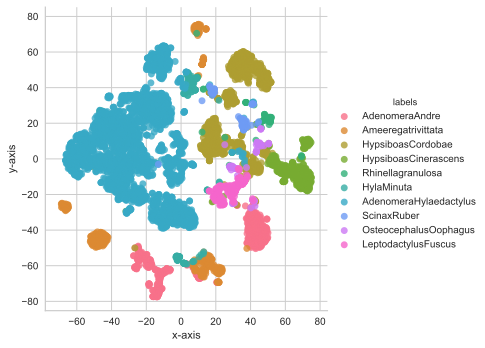

In [121]:
kmeans = KMeans(n_clusters = 34, random_state = 1)
kmeans.fit(X_scaled)
prediction= kmeans.predict(X_scaled)
    
labels = np.zeros_like(prediction)

for i in range(n_clusters):
    mask = (prediction == i)
    labels[mask] = mode(y[mask])[0]

print('Accuracy: ',accuracy_score(y, labels))

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(transformed)
proj.columns = ["x-axis", "y-axis"]
proj["labels"] = le.inverse_transform(labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj ,fit_reg=False)


#### TSNE visualization of clusters formed using k-means on transformed data

Accuracy:  0.9369006254343294


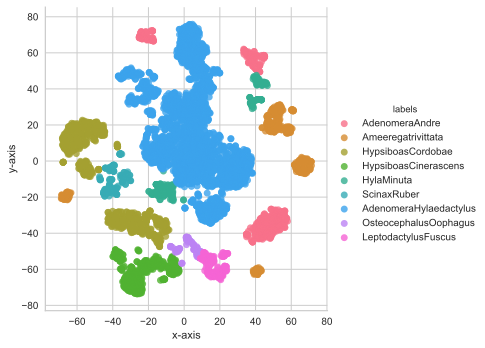

In [120]:
kmeans = KMeans(n_clusters = 34)
kmeans.fit(scaled_transformed)
tsne_prediction= kmeans.predict(scaled_transformed)

tsne_labels = np.zeros_like(tsne_prediction)
for i in range(34):
    mask = (tsne_prediction == i)
    tsne_labels[mask] = mode(y[mask])[0]
        
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
proj1 = pd.DataFrame(scaled_transformed)
proj1.columns = ["x-axis", "y-axis"]
proj1["labels"] = le.inverse_transform(tsne_labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj1 ,fit_reg=False)
print("Accuracy: ", accuracy_score(tsne_labels, y))


#### TSNE visualization of clusters formed using specetral clustering

0.9210562890896455


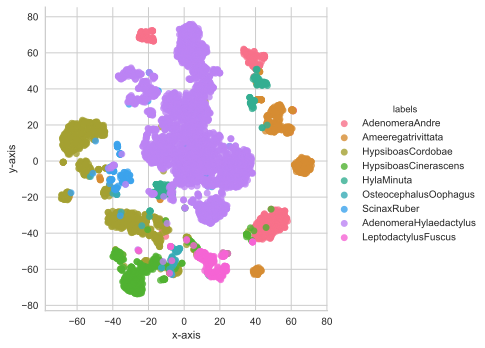

In [122]:
clustering = SpectralClustering(n_clusters=34, assign_labels="discretize", random_state=0).fit(X)

spectral_prediction = clustering.fit_predict(X)

spectral_labels = np.zeros_like(spectral_prediction)
for i in range(34):
    mask = (spectral_prediction == i)
    spectral_labels[mask] = mode(y[mask])[0]

print(accuracy_score(y, spectral_labels))

matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
proj1 = pd.DataFrame(scaled_transformed)
proj1.columns = ["x-axis", "y-axis"]
proj1["labels"] = le.inverse_transform(spectral_labels)
sns.lmplot("x-axis", "y-axis", hue = "labels", data = proj1 ,fit_reg=False)


## Final Conclusion

##### K-means on original data : Accuracy is 93.57% and clusters of all labels are present.
##### K-means on scaled data : Accuracy is 93.74% and clusters of all labels are present.
##### K-means on scaled and transformed data : Accuracy is 93.69% and clusters of all labels but Rhinellagranulosa are present.
##### Spectral clustering on original data   : Accuracy is 92.10% and clusters of all labels but Rhinellagranulosa are present.

If we look carefully into the graph of visualization of data using tsne, the occurance of Rhinellagranulosa is very small and usually occurs within the area of very large clusters. That is why it is very hard to label them. But still it is astonishing that normal K-means could find clusters of all the labels present but spectral couldn't. Normal K-means worked better possibly because in the high dimensional space it was easier to distinguish these rare occurances than in any smaller dimensional space. 
